

# Project: Investigate a Dataset (Titanic)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#posibility">Posibility of Survival</a></li>
    <li><a href="#posi_pclass">Pclass</a></li>
    <li><a href="#posi_sex">Sex</a></li>
    <li><a href="#posi_age">Age</a></li>
    <li><a href="#posi_pclass_age">Pclass and Age</a></li>
    <li><a href="#posi_pclass_sex">Pclass and Sex</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I would like to analyze Titanic data set.    
I will try to answer that "How 'Pclass, Sex, and Age' influence the possibility of survival?"    
I will focus on Pclass, Sex, Age.    
I will start from a signle factor and then take several factors together into consideration.

In [1]:
# Set up import statements for all of the packages that I plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Methods:

In [2]:
# check whether there is a null
# input format: titanic_data['Age']
def checkIsNull(data):
    num = np.where(pd.isnull(data))[0].size
    if num == 0:
        print('No Null.')
    else:
        print(num)
        
# delete rows with empty cell in given fields
# data: the original data set in Pandas.DataFrame, like titanic_data
# 
def deleteNA(data, fieldlist):
    return data.dropna(subset=[fieldlist])


# Get the columns interested in
# Input: titanic_data, ['PassengerId','Age']
def get_interested_colums(data,fieldlist):
    return data.loc[:,fieldlist]

#Get number of passengers according to 'PassengerId'
def get_number_of_passengers(data):
    return data.count()['PassengerId']

# calculate posibility according to the number of items
def calculatePosibility(target, total):
    return len(target)/len(total)

# calculate the posibilities for given field
# data: titanic_data, fieldname: 'Sex'
def calculate_surrived_possibility_vectoriezed(data, fieldname):
    data_by_class = data.groupby(fieldname)
    total = get_number_of_passengers(data_by_class)
    
    data_by_class_and_survived = titanic_data.groupby([fieldname,'Survived'])
    target = get_number_of_passengers(data_by_class_and_survived)
    
    return target.div(total)

# calculate the posibilities for given age range
# e.g. calculate_survived_posibility_between_ages(titanic_data, 0, 18)

def calculate_survived_posibility_between_ages(data, start_age, end_age):
    total = data.loc[(data['Age']>start_age) &
                     (data['Age']<end_age), 'Age']
    target = data.loc[(data['Survived'] ==1) &
                      (data['Age']>start_age) &
                      (data['Age']<end_age), 'Age']
    return calculatePosibility(target, total)

# Get given Column with surrived condition

def get_column(data, fieldname, survived = 0):
    return data.loc[data['Survived'] ==survived,[fieldname]]

# double items in a list
# [2,3]->[2,2,3,3,]
def dupItems(li):
    new_li = []
    for x in li:
        new_li.append(x)
        new_li.append(x)
    return new_li

<a id='wrangling'></a>
## Data Wrangling

Load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

- I will only focus on 'Pclass', 'Sex', and 'Age'. Because:
- a. it's less likely that 'Name', 'Ticket' will influence the survival.    
- b. 'Fare' corresponds to 'PClass'. 
- c. There are a lot passengers absent of the 'Cabin' information.
- d. For simplicity, just ignore , 'SibSp', 'Parch' and 'Embarked' here.


### General Properties

In [3]:
# Load data and print out a few lines. 

filename = "titanic-data.csv"
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
# check whether the data types meet the needs.

# All of the data types meet my needs.

print(titanic_data['PassengerId'].dtype)
print(titanic_data['Survived'].dtype)
print(titanic_data['Pclass'].dtype)
print(titanic_data['Name'].dtype)
print(titanic_data['Sex'].dtype)
print(titanic_data['Age'].dtype)
print(titanic_data['SibSp'].dtype)
print(titanic_data['Parch'].dtype)

int64
int64
int64
object
object
float64
int64
int64


In [5]:
#Check the empty cells
#There are a lot of empty cells in 'Age' column

checkIsNull(titanic_data['PassengerId'])
checkIsNull(titanic_data['Survived'])
checkIsNull(titanic_data['Pclass'])
checkIsNull(titanic_data['Fare'])
checkIsNull(titanic_data['Name'])
checkIsNull(titanic_data['Sex'])
checkIsNull(titanic_data['Age'])

No Null.
No Null.
No Null.
No Null.
No Null.
No Null.
177



### Data Cleaning 

In [6]:
# Delete the rows which 'Age' is NAN
# Output: titanic_data_with_Age
print(len(titanic_data))
titanic_data_with_Age = deleteNA(titanic_data, 'Age')

#check again
print(len(titanic_data_with_Age))
checkIsNull(titanic_data_with_Age['Age'])

891
714
No Null.


In [7]:
# only keep the columns interested in
interested_list = ['PassengerId','Survived','Pclass','Sex','Age']

titanic_data_clean = get_interested_colums(titanic_data, interested_list)
titanic_data_clean.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [8]:
titanic_data_with_Age_clean = get_interested_colums(titanic_data_with_Age, interested_list)
print(len(titanic_data_clean))
print(len(titanic_data_with_Age_clean))
titanic_data_with_Age_clean.head()

891
714


,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


Note: I will use titanic_data or titanic_data_with_Age in following analysis depending on whether the factors relate to Age, in order to get more precise results.

In [9]:
#for test, to check whether they result in same posibilities.
titanic_data = titanic_data_clean
titanic_data_with_Age= titanic_data_with_Age_clean

<a id='eda'></a>
## Exploratory Data Analysis

<a id='posibility'></a>
### Posibility of Survival

- Calculate the overall possibility of survival

In [10]:
titanic_data_survived = titanic_data.loc[titanic_data['Survived'] ==1]

posibility =  calculatePosibility(titanic_data_survived,titanic_data)

print(posibility)

0.3838383838383838


<a id='posi_pclass'></a>
###  Pclass

- Step 1 How many passengers each class?
- Step 2 The possibilities of survival each class?

In [11]:
posibilities = calculate_surrived_possibility_vectoriezed(titanic_data,'Pclass')
print(posibilities)

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: PassengerId, dtype: float64


In [12]:
# Pearson's r
import numpy as np

entries = titanic_data['Pclass']
cum_entries = titanic_data['Survived']

np.corrcoef(entries,cum_entries)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

### Tentative Conclusion  
- The posibility of Survival(63%) for the Upper class(Pclass == 1) is highest and much higher than the overall possibility(38%).
- The posibility of Survival(47%) for the Middle class(Pclass == 2) is higher than that(24%) for the Lower class(Pclass == 3).

<a id='posi_sex'></a>
###  Sex

In [13]:
posibilities = calculate_surrived_possibility_vectoriezed(titanic_data,'Sex')
print(posibilities)

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: PassengerId, dtype: float64


#### Tentative Conclusion 
- More females(74%) survivied in the disaster than males(19%).

<a id='posi_age'></a>
### Age

In [14]:
data_by_survived = titanic_data.groupby(['Survived'])#,as_index=False
data_by_survived.describe()

Age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Survived                                                              
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0   

         PassengerId             ...                Pclass            \
               count        mean ...     75%    max  count      mean   
Survived                         ...                                   
0              549.0  447.016393 ...   675.0  891.0  549.0  2.531876   
1              342.0  444.368421 ...   651.5  890.0  342.0  1.950292   

                                             
               std  min  25%  50%  75%  max  
Survived                                     
0         0.735805  1.0  2.0  3.0  3.0  3.0  
1         0.863321  1.0  1.0  2.0  3.0  3.0  

[2 rows x 24 columns]

In [15]:
data_by_survived['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [16]:
titanic_data_survived = get_column(titanic_data_with_Age,'Age',1)
titanic_data_non_survived = get_column(titanic_data_with_Age,'Age',0)

(array([ 36.,  19.,  63.,  65.,  52.,  24.,  21.,   9.,   0.,   1.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

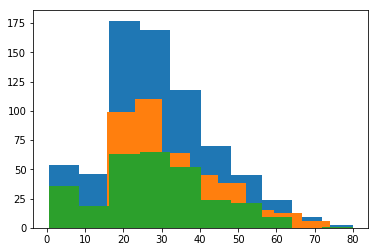

In [17]:
#Distribution of survived and unsurvivied passengers
plt.hist(titanic_data_with_Age['Age'])
plt.hist(titanic_data_non_survived['Age'])
plt.hist(titanic_data_survived['Age'])

(array([  18.,   16.,   99.,  110.,   64.,   45.,   38.,   15.,   13.,    6.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

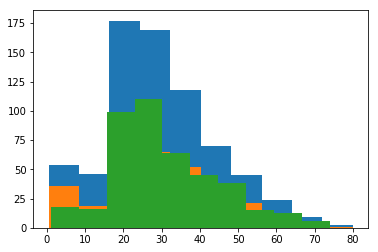

In [18]:
plt.hist(titanic_data_with_Age['Age'])
plt.hist(titanic_data_survived['Age'])
plt.hist(titanic_data_non_survived['Age'])

In [19]:
#posibility of passengers from 0 to 8 years old
calculate_survived_posibility_between_ages(titanic_data_with_Age,0 , 8)


0.68

In [20]:
#posibility of passengers from 17 to 30 years old
calculate_survived_posibility_between_ages(titanic_data_with_Age,17 , 30)


0.3505535055350554

In [21]:
#posibility of passengers from 30 to 40 years old
calculate_survived_posibility_between_ages(titanic_data_with_Age,30 , 40)


0.44366197183098594

#### Tentative Conclusion 
- From the mean of 'Age', the average age of passengers survivied is younger than that of ones unsurvived.
- From the distribution of the survived and unsurvivied passengers, the children aged from 0 to 8 are more likely to be survived.
- The age of most surrived passengers ranges from 17 to 40 years old.
- The chance of passengers aged from 30 to 40 is higher than the chance of passengers aged from 15 to 30.

<a id='posi_pclass_age'></a>
### Pclass and Age

#### Distribution of Age for passengers of Each Pclass

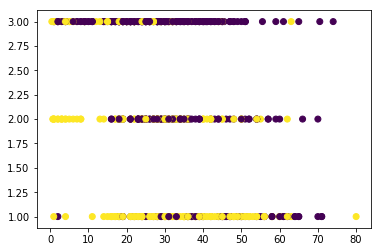

In [22]:
plt.scatter(titanic_data_with_Age['Age'],titanic_data_with_Age['Pclass'],c = titanic_data_with_Age['Survived'])

#### Tentative Conclusion 
- For each Pclass, the posibility of survival for children are higher.
- For the Lower class, the posibility for passengers aged greater than 30 is very low.

<a id='posi_pclass_sex'></a>
### Pclass and Sex

#### the distribution of females and males

Sex
female    314
male      577
Name: PassengerId, dtype: int64


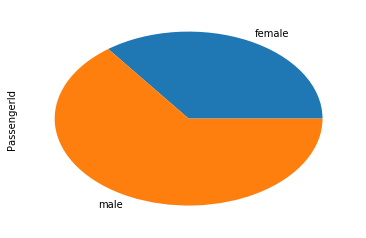

In [23]:
# there are more females than males
data_by_sex = titanic_data.groupby(['Sex'])

numbers_by_sex = get_number_of_passengers(data_by_sex)
print(numbers_by_sex)
numbers_by_sex.plot(kind='pie')

#### the distribution of females and males each class

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64
[94, 94, 122, 122, 76, 76, 108, 108, 144, 144, 347, 347]


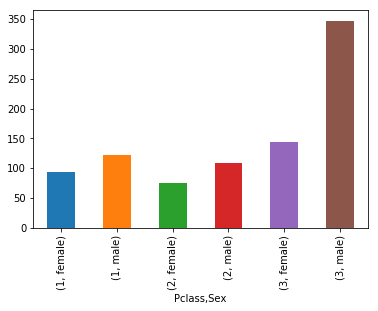

In [24]:
data_by_class_sex = titanic_data.groupby(['Pclass','Sex'])

numbers_by_class_sex = get_number_of_passengers(data_by_class_sex)
print(numbers_by_class_sex)
total = dupItems(numbers_by_class_sex.tolist())
print(total)
numbers_by_class_sex.plot(kind='bar')

#### the distribution of survived and unsurvived females and males each class

In [25]:
data_by_class_sex_survived = titanic_data.groupby(['Pclass','Sex','Survived'])

numbers_by_class_sex_survived = get_number_of_passengers(data_by_class_sex_survived)
numbers_by_class_sex_survived

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: PassengerId, dtype: int64

Pclass  Sex     Survived
1       female  0           0.031915
                1           0.968085
        male    0           0.631148
                1           0.368852
2       female  0           0.078947
                1           0.921053
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
dtype: float64


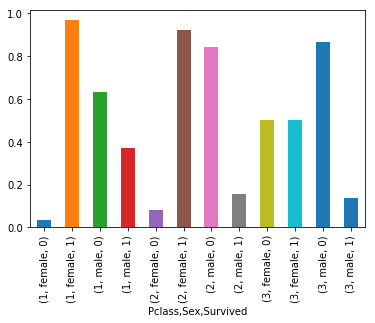

In [26]:
posibilities = numbers_by_class_sex_survived.div(total)
print(posibilities)
posibilities.plot(kind='bar')

#### Tentative Conclusion 
- There are more females than males for each class;
- The fraction of survived females is much higher than one of survived males for each class;
- The fraction of survived females increases for 50% to 92% to 97% as class level increases.

<a id='conclusions'></a>
##  Conclusions

- People may rescue Children first
- Males at that time are gentle
- Try our best to buy the upper class ticket